In [1]:
import torch.optim as optim
import torch.nn as nn
from qiskit.providers.fake_provider import FakeLima
from scripts.data_setup import load_data
from scripts.from_circ_to_numpy import operations_to_features, save_to_json, load_from_json
from scripts.model_ann_first import create_models, train_and_test_step, save_models, load_models
from qiskit.compiler import transpile

In [2]:
n_qubits = 5 # 5 == n_qubits, default value for now because of FakeLima
train_circuits, train_observables, train_ideal_exp_vals, train_noisy_exp_vals, test_circuits, test_observables, test_ideal_exp_vals, test_noisy_exp_vals = load_data('data/circuits/data_small_1')

In [3]:
backend = FakeLima()
n_qubits = 5

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.quantumcircuit import QuantumCircuit

def process_quantum_circuits(circuits, backend):
    depths = []
    num_gates = []
    gate_types = Counter()
    
    for circuit in circuits:
        #transpiled_circuit = transpile(circuit, optimization_level=0, backend=backend)

        transpiled_circuit = circuit
        
        depths.append(transpiled_circuit.depth())
        
        gate_counts = transpiled_circuit.count_ops()
        total_gates = sum(gate_counts.values())
        num_gates.append(total_gates)
        
        for gate, count in gate_counts.items():
            gate_types[gate] += count
    
    plt.hist(depths, bins=range(min(depths), max(depths) + 1, 10))
    plt.xlabel('Depth')
    plt.ylabel('Number of circuits')
    plt.title('Circuit Depths')
    plt.grid(True)
    plt.show()

    plt.hist(num_gates, bins=range(min(num_gates), max(num_gates) + 1, 10))
    plt.xlabel('Number of Gates')
    plt.ylabel('Number of circuits')
    plt.title('Number of Gates')
    plt.grid(True)
    plt.show()
    
    gate_labels = list(gate_types.keys())
    gate_counts = list(gate_types.values())
    plt.bar(gate_labels, gate_counts)
    plt.xlabel('Gate Type')
    plt.ylabel('Frequency')
    plt.title('Gate Type Counts')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

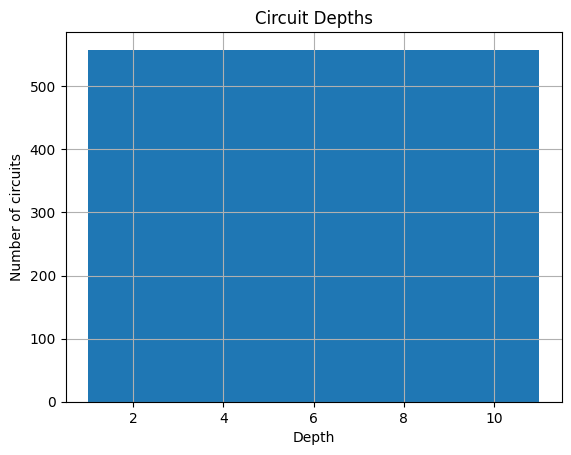

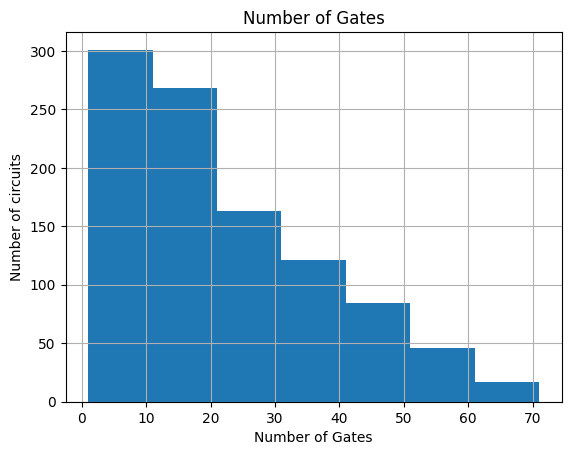

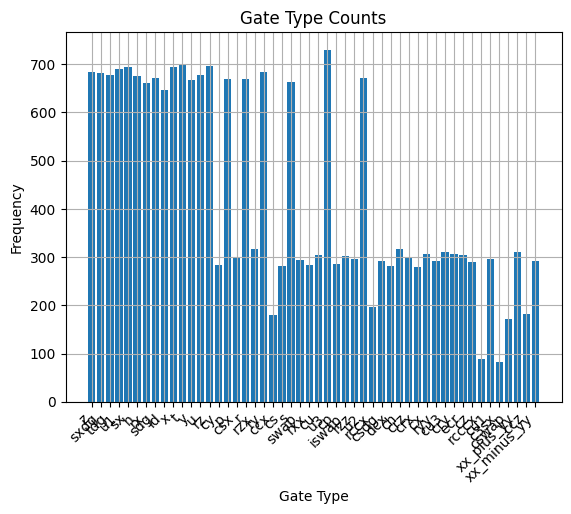

In [5]:
process_quantum_circuits(train_circuits, backend)

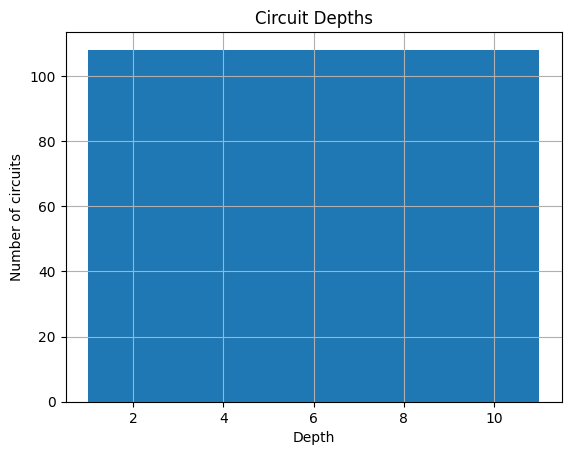

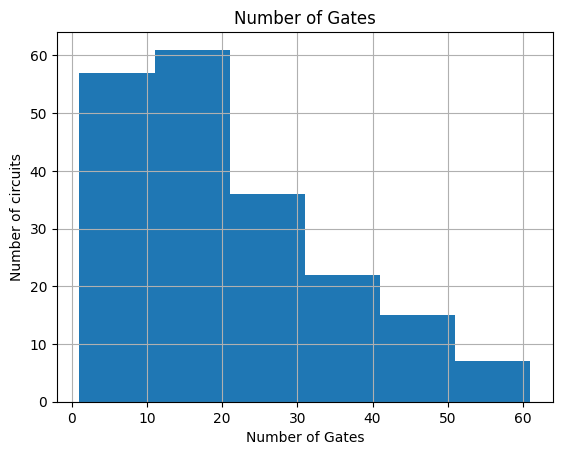

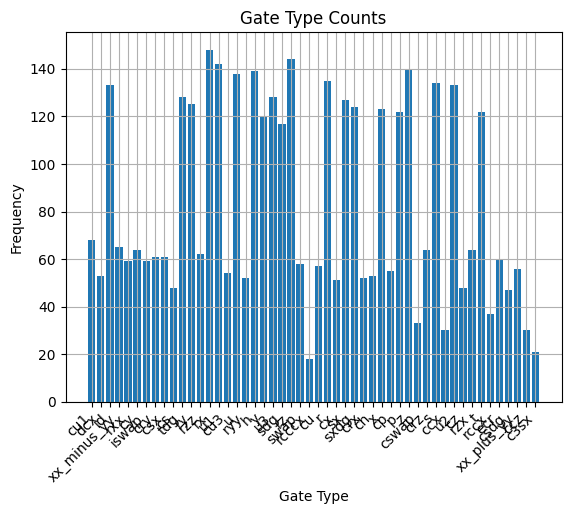

In [6]:
process_quantum_circuits(test_circuits, backend)

In [8]:
#transpile(train_circuits[25], optimization_level=0, backend=backend).draw('mpl')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.quantumcircuit import QuantumCircuit

def process_quantum_circuits(circuits, backend):
    depths = []
    num_gates = []
    gate_types = Counter()
    
    for circuit in circuits:
        transpiled_circuit = transpile(circuit, optimization_level=0, backend=backend)

        #transpiled_circuit = circuit
        
        depths.append(transpiled_circuit.depth())
        
        gate_counts = transpiled_circuit.count_ops()
        total_gates = sum(gate_counts.values())
        num_gates.append(total_gates)
        
        for gate, count in gate_counts.items():
            gate_types[gate] += count
    
    plt.hist(depths, bins=range(min(depths), max(depths) + 1, 10))
    plt.xlabel('Depth')
    plt.ylabel('Number of circuits')
    plt.title('Circuit Depths')
    plt.grid(True)
    plt.show()

    plt.hist(num_gates, bins=range(min(num_gates), max(num_gates) + 1, 10))
    plt.xlabel('Number of Gates')
    plt.ylabel('Number of circuits')
    plt.title('Number of Gates')
    plt.grid(True)
    plt.show()
    
    gate_labels = list(gate_types.keys())
    gate_counts = list(gate_types.values())
    plt.bar(gate_labels, gate_counts)
    plt.xlabel('Gate Type')
    plt.ylabel('Frequency')
    plt.title('Gate Type Counts')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

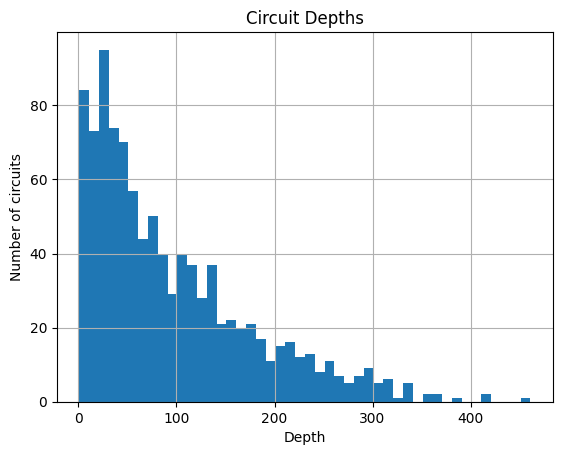

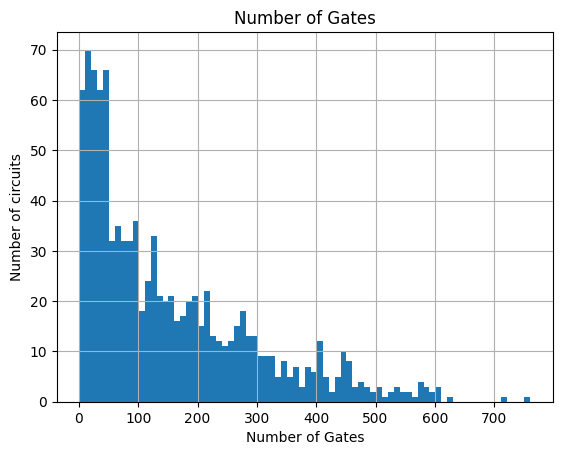

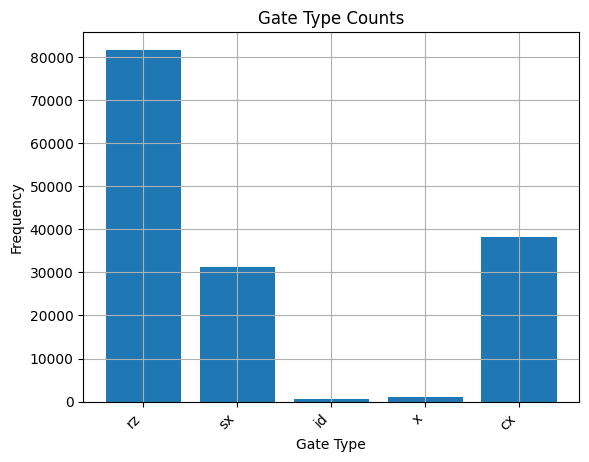

In [11]:
process_quantum_circuits(train_circuits, backend)

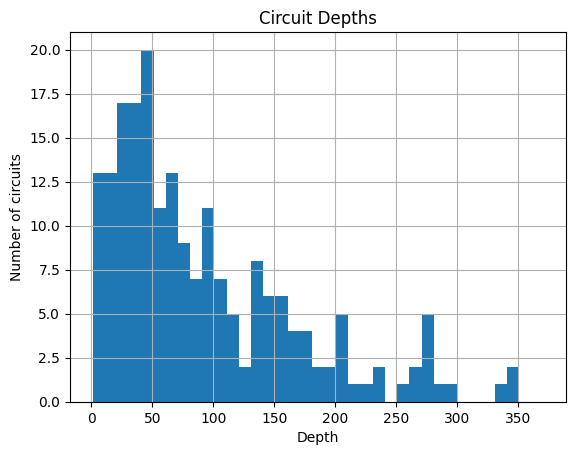

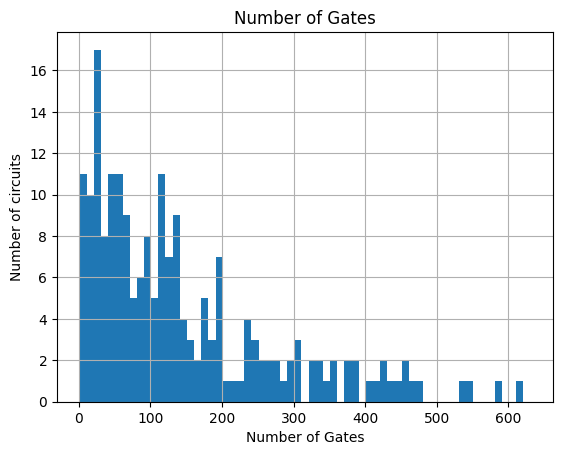

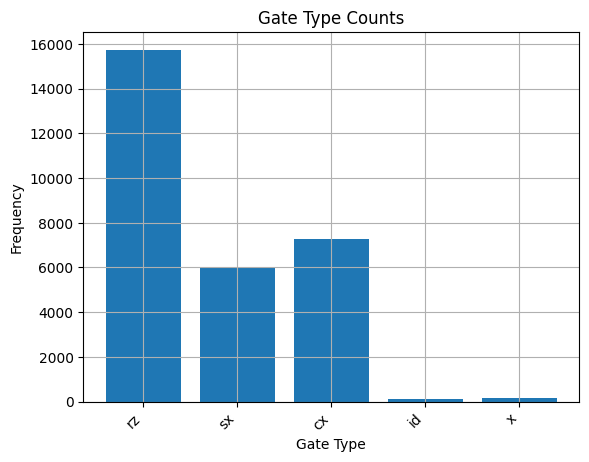

In [12]:
process_quantum_circuits(test_circuits, backend)